In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[to_drop], axis=1)

In [4]:
df = df[['v1','v2']]
df.columns = ['label', 'message']

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
label_counts = df['label'].value_counts()
label_counts

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df['message_length'] = df['message'].apply(len)
df['message_length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_length, dtype: float64

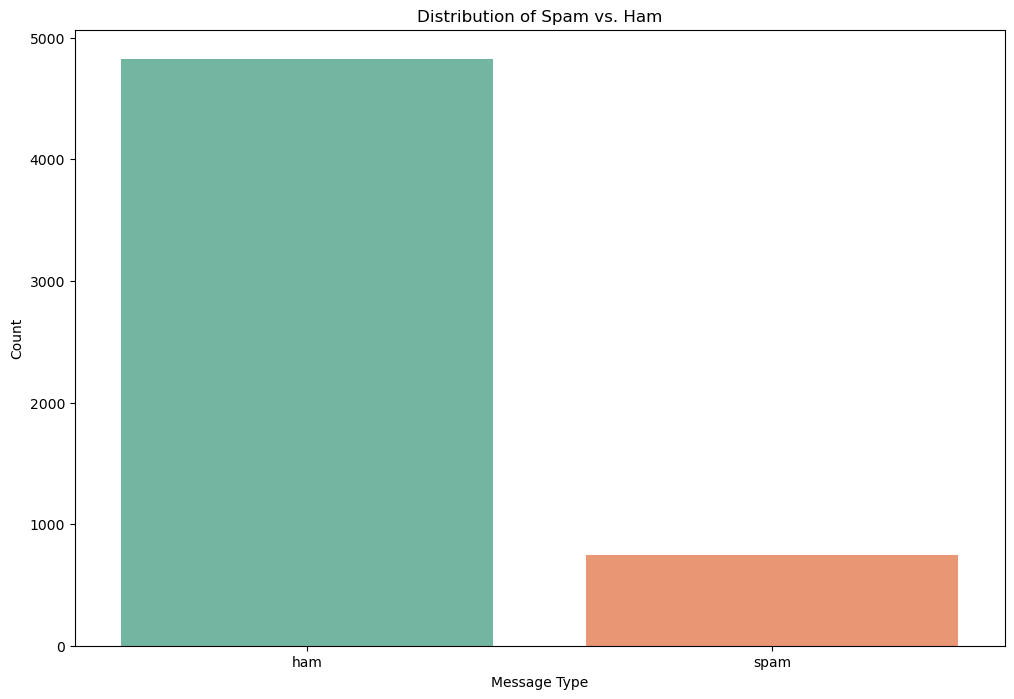

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(data = df,x='label',palette = 'Set2')
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Message Type')
plt.ylabel("Count")
plt.show()

In [10]:
df['cleaned_message'] = df['message'].str.lower()
df[['message', 'cleaned_message']].head()

,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [11]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords_specialchars(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

df['cleaned_message'] = df['cleaned_message'].apply(remove_stopwords_specialchars)
df[['message', 'cleaned_message']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['cleaned_message'] = df['cleaned_message'].apply(apply_stemming)
df[['message', 'cleaned_message']].head()

,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['cleaned_message'])
X_bow.shape

(5572, 7213)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_message'])
X_tfidf.shape  

(5572, 7213)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (4457, 7213)
Testing set size: (1115, 7213)


In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9668161434977578
Precision: 1.0
Recall: 0.7533333333333333
F1 Score: 0.8593155893536122


In [20]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))


Confusion Matrix:
 [[965   0]
 [ 37 113]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [21]:
X_train_bow, X_test_bow, _, _ = train_test_split(X_bow, y, test_size=0.2, random_state=42)
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [22]:
y_pred_bow = model_bow.predict(X_test_bow)

In [23]:
print("=== BoW Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("Precision:", precision_score(y_test, y_pred_bow))
print("Recall:", recall_score(y_test, y_pred_bow))
print("F1 Score:", f1_score(y_test, y_pred_bow))

=== BoW Model ===
Accuracy: 0.9775784753363229
Precision: 0.9139072847682119
Recall: 0.92
F1 Score: 0.9169435215946844


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_and_lemmatize(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

# Apply preprocessing
df['lemmatized'] = df['message'].apply(preprocess_and_lemmatize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
y = df['label']

# BoW and TF-IDF vectorizers
vectorizers = {
    'BoW': CountVectorizer(),
    'TF-IDF': TfidfVectorizer()
}
results = {}

for name, vectorizer in vectorizers.items():
    X = vectorizer.fit_transform(df['lemmatized'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [29]:
results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True),
        'conf_matrix': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred,
        'y_test': y_test
    }

In [30]:
print(f"\n=== {name} ===")
print("Accuracy:", results[name]['accuracy'])
print(classification_report(y_test, y_pred))


=== TF-IDF ===
Accuracy: 0.9614349775784753
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.72      0.83       150

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



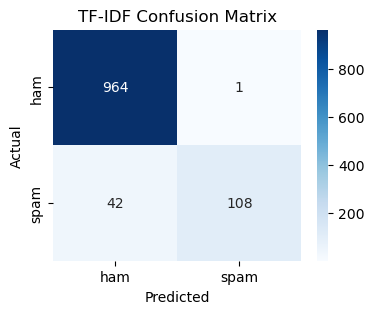

In [31]:
plt.figure(figsize=(4,3))
sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title(f'{name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()